In [1]:
%pip install xgboost
# it is done for classification . boosting is done by this model so when doing boosting and bagging run this

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
sns.set()

In [3]:
# load dataset 
df = pd.read_csv("Loan_default.csv")
df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.columns.tolist()

['LoanID',
 'Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner',
 'Default']

In [5]:
if "LoanID" in df.columns:
    df.drop("LoanID",axis=1,inplace=True)

In [6]:
# df.columns.tolist()
df.shape

(255347, 17)

In [7]:
df = df.dropna()

In [8]:
# HasMortgage,HasDependents,HasCoSigner
# convert yes / no to 1 and 0
binary_cols = ["HasMortgage","HasDependents","HasCoSigner"]
for cols in binary_cols:
    df[cols] = df[cols].map({"Yes":1,"No":0})

In [9]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0


In [10]:
# Education,EmploymentType,MaritalStatus,LoanPurpose
categorical_cols = ["Education","EmploymentType","MaritalStatus","LoanPurpose"]
for col in categorical_cols:
    df[col] =df[col].astype("category").cat.codes
print("Data done")
print(df.head())

Data done
   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         15.23        36      0.44          0               0              0   
1          4.81        60      0.68          2               0              1   
2         21.17        24      0.31          2               3              0   
3          7.07        24      0.23          1               0              1   
4          6.51        48      0.73          0               3              0   

   HasMortgage  HasDependents  LoanPurpose  HasCoSig

In [11]:
# feature and target
target_col = "Default"
X = df.drop(target_col,axis=1)
y = df[target_col]

In [12]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [13]:
X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=42) 

In [14]:
rf = RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,rf_pred))
print("classification_report" ,classification_report(y_test,rf_pred))

Accuracy :  0.8859908830302176
classification_report               precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.64      0.05      0.09      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837



In [16]:
# gradient boosting
gb = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=3,random_state=42)
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,gb_pred))
print("classification_report" ,classification_report(y_test,gb_pred))

Accuracy :  0.886664473581152
classification_report               precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.67      0.05      0.09      7427

    accuracy                           0.89     63837
   macro avg       0.78      0.52      0.52     63837
weighted avg       0.86      0.89      0.84     63837



In [17]:
#xgboost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,xgb_pred))
print("classification_report" ,classification_report(y_test,xgb_pred))

Accuracy :  0.8868681172360856
classification_report               precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.12      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.84     63837



In [21]:
# ADA boosting
ada = AdaBoostClassifier(
    n_estimators=150,
    learning_rate=0.5,
    random_state= 42
)
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,ada_pred))
print("classification_report" ,classification_report(y_test,ada_pred))

Accuracy :  0.8857559095822172
classification_report               precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.68      0.03      0.07      7427

    accuracy                           0.89     63837
   macro avg       0.78      0.52      0.50     63837
weighted avg       0.86      0.89      0.84     63837



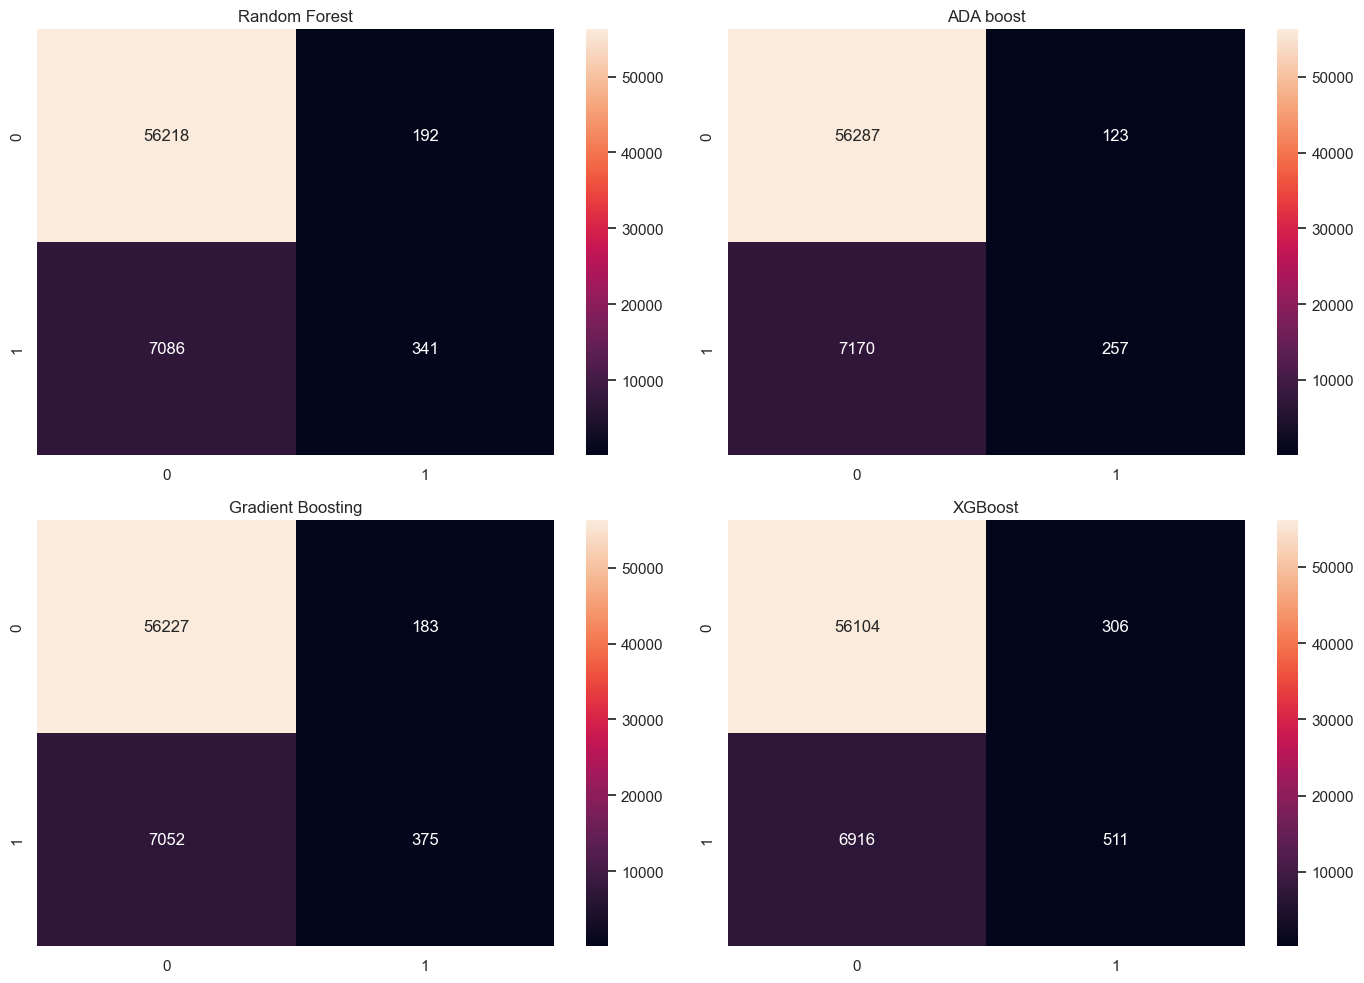

In [23]:
# confusion matrices 
fig,axes = plt.subplots(2,2,figsize=(14,10))
models = [
    ('Random Forest',rf_pred),
    ("ADA boost",ada_pred),
    ("Gradient Boosting",gb_pred),
    ("XGBoost",xgb_pred)
]
for ax , (title,pred) in zip(axes.flatten(),models):
    sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d',ax=ax)  # heatmap is made on basis of confusion matrix
    ax.set_title(title)
plt.tight_layout()
plt.show()

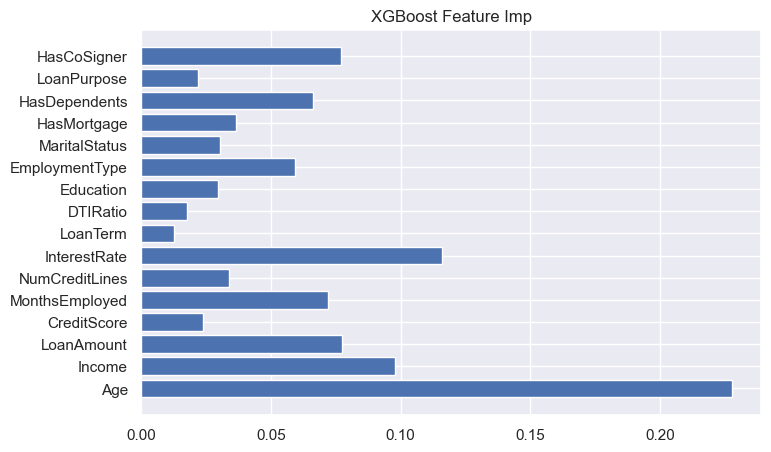

In [24]:
plt.figure(figsize=(8,5))
plt.barh(X.columns,xgb.feature_importances_)
plt.title('XGBoost Feature Imp')
plt.show()